## Importing the libraries

In [2]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,6

## Importing the Dataset

In [3]:
dataset_rainfall=pd.read_csv("Desktop/final_rainfall.csv")

In [4]:
dataset_rainfall.head()

,Date,Total
0,01-01-2004,0.0
1,02-01-2004,0.0
2,03-01-2004,0.0
3,04-01-2004,0.0
4,05-01-2004,0.0


## Pre-processing the dataset

In [5]:
dataset_rainfall['Date']=pd.to_datetime(dataset_rainfall['Date'], infer_datetime_format=True)
indexDataset = dataset_rainfall.set_index(['Date'])

In [6]:
from datetime import datetime
indexDataset.head()

,Total
Date,
2004-01-01,0.0
2004-02-01,0.0
2004-03-01,0.0
2004-04-01,0.0
2004-05-01,0.0


## Plotting the dataset to check the stationarity of the data

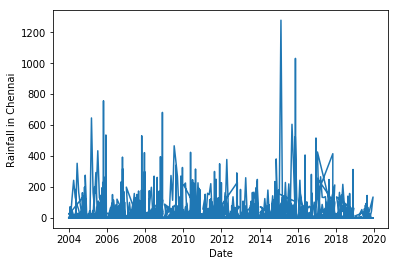

In [7]:
plt.xlabel("Date")
plt.ylabel("Rainfall in Chennai")
plt.plot(indexDataset['Total'])

## Plotting the dataset to check the different components of time series

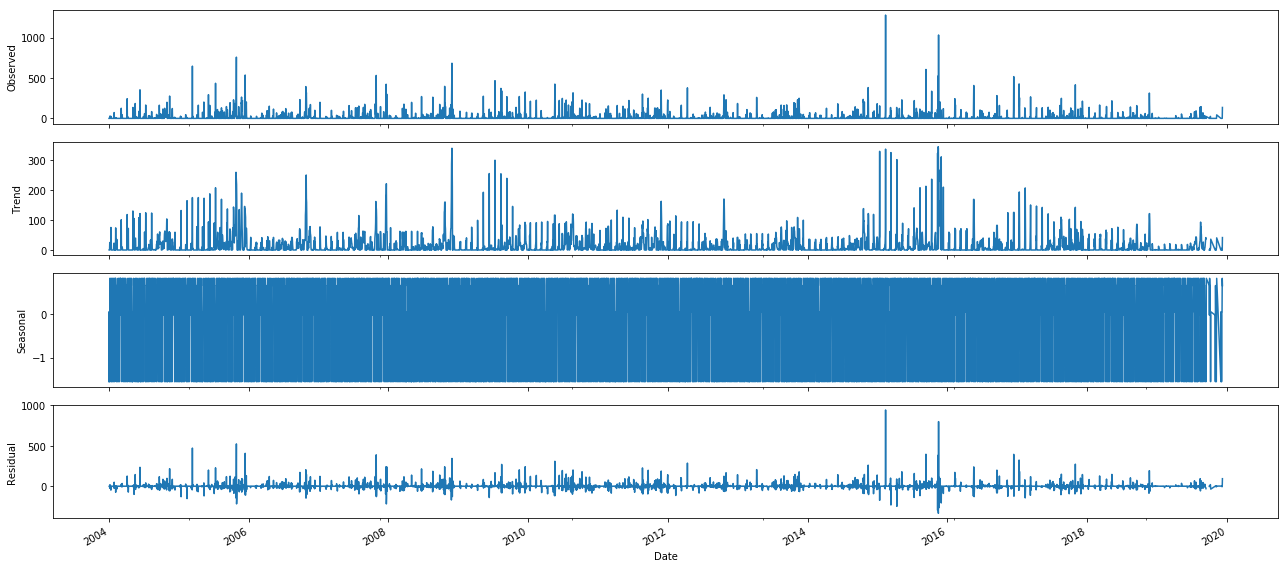

In [8]:
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(indexDataset['Total'], model='additive',freq = 5)
fig = decomposition.plot()
plt.show()

## To Make the dataset stationary

In [9]:
indexDataset.shift(1)
indexed_diff = indexDataset.diff(periods=1)
indexed_diff = indexed_diff[1:]
indexed_diff.head()

,Total
Date,
2004-02-01,0.0
2004-03-01,0.0
2004-04-01,0.0
2004-05-01,0.0
2004-06-01,0.0


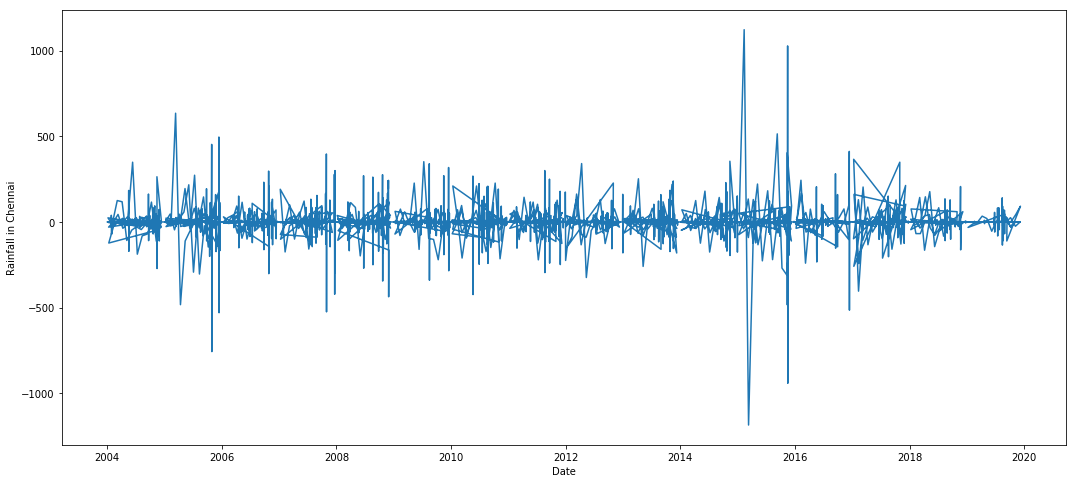

In [10]:
plt.xlabel("Date")
plt.ylabel("Rainfall in Chennai")
plt.plot(indexed_diff['Total'])

## AR Model Implementation

In [11]:
from sklearn.model_selection import train_test_split 


X = indexed_diff['Total'].values
train = X[0:5000]# train data
test = X[5000:]                 
predictions = []

In [12]:
from statsmodels.tsa.ar_model import AR
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [13]:
predictions = model_ar_fit.predict(start=5000,end=5736)

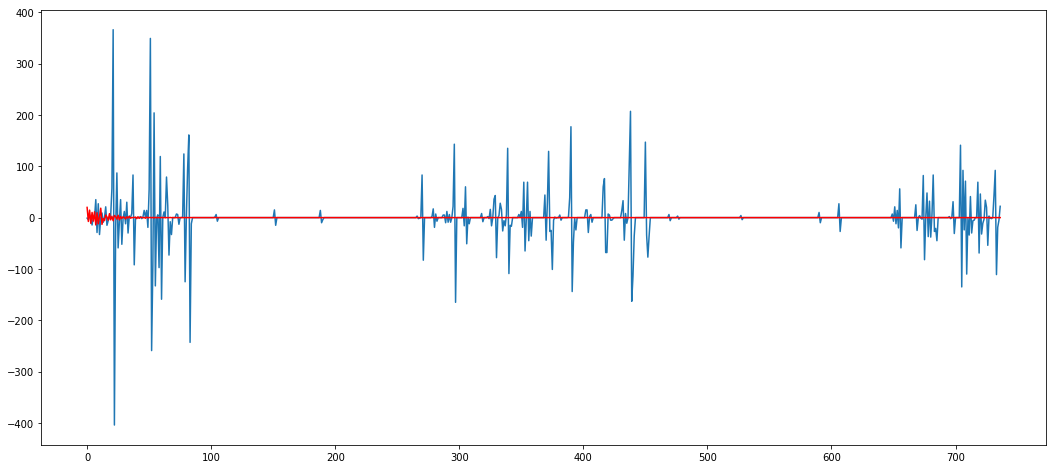

In [14]:
plt.plot(test)
plt.plot(predictions,color='red')

In [17]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
test_set_rmse = (np.sqrt(mean_squared_error(test, predictions)))
test_set_r2 = r2_score(test, predictions)

In [18]:
print(test_set_rmse)

1132.11

In [19]:
print(test_set_r2)

0.6342

## ARIMA MODEL

In [20]:
from statsmodels.tsa.arima_model import ARIMA

In [21]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(1,0,1))
model_arima_fit = model_arima.fit()

In [22]:
predictions= model_arima_fit.forecast(steps=737)[0]
predictions

array([1.05985665e+01, 2.84296083e+00, 7.65696870e-01, 2.09321806e-01,
       6.03021259e-02, 2.03886458e-02, 9.69820611e-03, 6.83487523e-03,
       6.06795975e-03, 5.86254885e-03, 5.80753153e-03, 5.79279567e-03,
       5.78884881e-03, 5.78779169e-03, 5.78750854e-03, 5.78743271e-03,
       5.78741240e-03, 5.78740695e-03, 5.78740550e-03, 5.78740511e-03,
       5.78740500e-03, 5.78740497e-03, 5.78740497e-03, 5.78740497e-03,
       5.78740496e-03, 5.78740496e-03, 5.78740496e-03, 5.78740496e-03,
       5.78740496e-03, 5.78740496e-03, 5.78740496e-03, 5.78740496e-03,
       5.78740496e-03, 5.78740496e-03, 5.78740496e-03, 5.78740496e-03,
       5.78740496e-03, 5.78740496e-03, 5.78740496e-03, 5.78740496e-03,
       5.78740496e-03, 5.78740496e-03, 5.78740496e-03, 5.78740496e-03,
       5.78740496e-03, 5.78740496e-03, 5.78740496e-03, 5.78740496e-03,
       5.78740496e-03, 5.78740496e-03, 5.78740496e-03, 5.78740496e-03,
       5.78740496e-03, 5.78740496e-03, 5.78740496e-03, 5.78740496e-03,
      

In [23]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
test_set_rmse = (np.sqrt(mean_squared_error(test, predictions)))
test_set_r2 = r2_score(test, predictions)

In [24]:
print(test_set_rmse)

643.9896

In [25]:
print(test_set_r2)

0.76331